# Problem

The maze problem is one where we are given an input .txt file of all the edges in the maze with a format as follows:

```
n      ## Final point to reach -1
a b d  ## point A, point B, direction in which they are connected
a b d
a b d
...
```

We are also given that the starting point is index 0 and the desired end point is the last index. We must determine the shortest path from start to end given that we can only movements in a specific direction and then move three vertices in that direction.

# Solution 

## Modeling

### Modeling as a graph

Begin by first creating the graph of the given maze. From the input file, add the edges to an undirected graph with the direction specified for each edge. Nodes represent the bugs. 

From this initial graph, generate another graph taking into consideration the spider's movement ability. If the spider can not visit one of the nodes then that node will not be in the generated graph. From the generated graph, determine a path from the start point to the final point.


### Drawing

Please see attached hand drawing and below drawings that are generated by the code.

### Graph Algorithm

Traversal with breadth first search to determine all the edges that would be possible to cross and the nodes that would be visitable.

### Proof

The algorithm imitates the spider's movement and determines all the possible bugs that it could reach following its movement ability. If the spider can reach a node it will be added to this new graph and therefore if there is a path, it will be found. It is the equivalent of an exhaustive search.

## Code

### Build the original graph from input file

In [126]:
import networkx as nx
import matplotlib.pyplot as plt

def generateGraph(fileName):
    G = nx.Graph()
    f = open(fileName, 'r')
    lines = f.readlines()
    finalPoint = int(lines[0])+1
    for line in lines[1:]:
        l = line.split()
        a = int(l[0])
        b = int(l[1])
        d = l[2]
        G.add_edge(a,b)
        G[a][b]['direction'] = d
        
    return G, finalPoint


The graph has 93 nodes and 118 edges


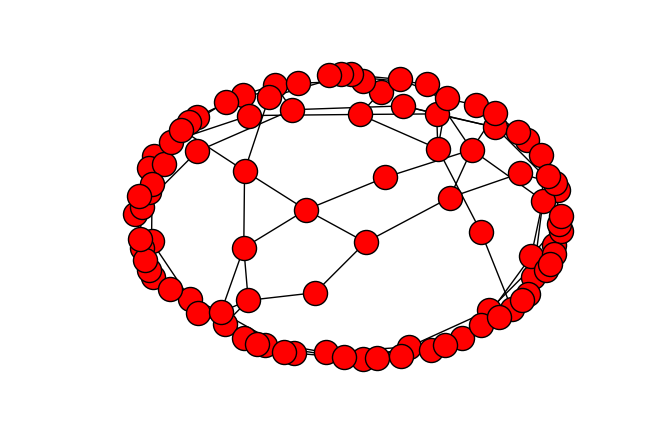

In [150]:
G, finalPoint = generateGraph('spiderMaze.txt')
print("The graph has {} nodes and {} edges"\
      .format(G.number_of_nodes(), G.number_of_edges()))

nx.draw(G)
plt.show()

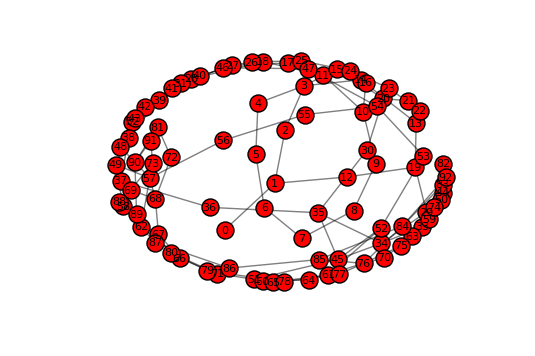

In [128]:
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=150)
nx.draw_networkx_edges(G,pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=8)
plt.axis('off')
plt.show()

In [129]:
print(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [130]:
print(G.edges())

[(0, 1), (1, 2), (1, 12), (2, 3), (3, 4), (3, 14), (3, 15), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 16), (10, 11), (11, 18), (12, 19), (13, 19), (13, 14), (15, 20), (16, 17), (17, 27), (18, 28), (19, 29), (20, 21), (20, 30), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (27, 31), (28, 32), (28, 31), (29, 33), (29, 34), (30, 35), (31, 41), (31, 42), (32, 43), (33, 34), (33, 44), (34, 35), (34, 45), (35, 36), (35, 45), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (41, 46), (42, 48), (42, 43), (43, 49), (44, 50), (45, 51), (45, 52), (46, 47), (47, 54), (48, 57), (49, 57), (49, 58), (50, 59), (51, 60), (52, 61), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 68), (57, 62), (58, 69), (59, 63), (60, 64), (61, 65), (62, 66), (63, 74), (63, 70), (64, 76), (65, 71), (66, 67), (66, 71), (67, 68), (68, 72), (68, 69), (69, 73), (70, 76), (71, 80), (71, 79), (72, 81), (73, 91), (74, 82), (74, 75), (75, 76), (76, 84), (76, 85), (76, 77), (

In [131]:
G[15]

{3: {'direction': 'S'}, 20: {'direction': 'S'}}

In [132]:
G.neighbors(0)

[1]

### Generate new graph with possible motion

In [141]:
def getNeighborsWithDirection(g,currentPoints,direction,excluding=[]):
    """
        Given a graph and some starting points, find neighbors in a specific direction
        excluding a certain subset
    """
    points = []
    for point in currentPoints:
        if point != -1:
            for n in g.neighbors(point):
                if g[point][n]['direction'] == direction:
                    if n not in excluding:
                        points.append(n)
    return points


def getNInDirectionFrom(g,n,d,start):
    """
        Given a graph, a direction and some starting points, find the nodes in the direction
        that are n nodes away.
    """
    counter = 0
    currentPoints = [start]
    allPassedPoints = [start]
    while counter < n:
        currentPoints = list(set(getNeighborsWithDirection(g,currentPoints, d, allPassedPoints)))
        for p in currentPoints:
            allPassedPoints.append(p)
        counter+= 1
    return currentPoints

def bfs(g,p,start, moves, explored):
    """
        Apply one iteration of breadth first search on a graph starting at a certain point
        moving a certain amount in any direction
        then returning those new points and adding them to the new graph
    """
    points = []
    for point in start:
        if point != -1 and point not in explored:
            neighbors = g.neighbors(point)
            for n in neighbors:
                direction = g[point][n]['direction']
                nextPoints = getNInDirectionFrom(g,moves,direction,point)
                for nextPoint in nextPoints:
                    if nextPoint != -1:
                        points.append(nextPoint)
                        p.add_edge(point,nextPoint)
            explored.append(point)
    return p, points

def generatePossible(g,moves):
    """
        Given a graph and a number of moves, generate a new graph of all the possible movements
        assuming nodes are only connected after moving that number of moves.
    """
    p = nx.Graph()
    nextPoints = [0]
    exploredPoints = []
    while nextPoints != [] and nextPoints != [-1]:
        p, nextPoints = bfs(g,p,nextPoints,moves, exploredPoints)
        nextPoints = list(set(nextPoints))

    return p

In [142]:
getNeighborsWithDirection(G,[0],'E')

[1]

In [143]:
getNInDirectionFrom(G,3,'S',30)

[3, 51]

The graph has 85 nodes and 84 edges


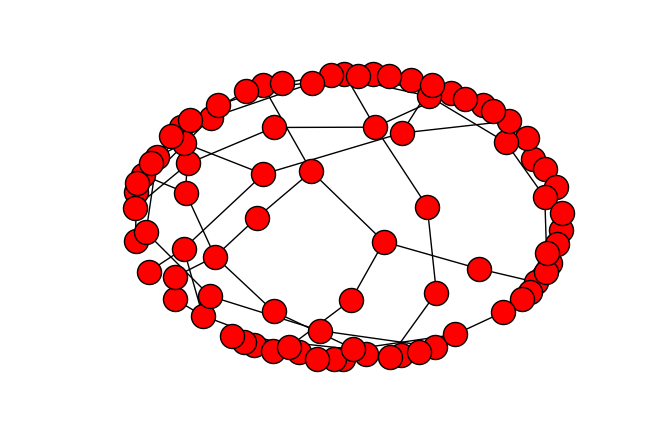

In [144]:
P = generatePossible(G,3)
print("The graph has {} nodes and {} edges".format(P.number_of_nodes(), P.number_of_edges()))
nx.draw(P)
plt.show()

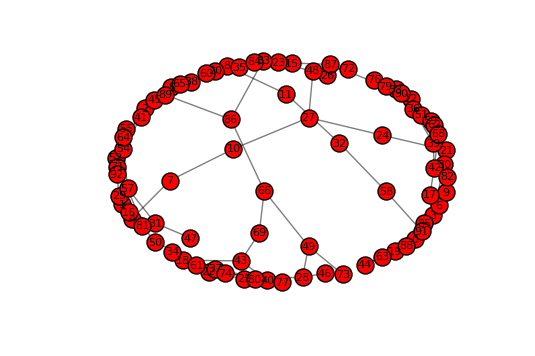

In [145]:
pos=nx.spring_layout(P)
nx.draw_networkx_nodes(P,pos,node_size=150)
nx.draw_networkx_edges(P,pos, width=1, alpha=0.5)
nx.draw_networkx_labels(P,pos,font_size=8)
plt.axis('off')
plt.show()

In [146]:
print(P.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]


In [147]:
print(P.edges())

[(0, 3), (1, 4), (1, 29), (2, 5), (3, 19), (3, 30), (3, 6), (4, 7), (5, 8), (6, 9), (7, 10), (8, 11), (10, 27), (11, 32), (12, 33), (15, 35), (16, 31), (17, 42), (18, 43), (19, 44), (20, 45), (20, 23), (21, 24), (22, 25), (23, 26), (24, 27), (25, 28), (27, 48), (28, 49), (28, 46), (29, 50), (29, 52), (30, 51), (31, 57), (31, 47), (32, 58), (33, 59), (33, 36), (34, 61), (34, 37), (35, 60), (35, 38), (36, 39), (37, 40), (38, 41), (39, 42), (40, 43), (41, 54), (42, 68), (43, 69), (44, 63), (45, 64), (45, 65), (48, 72), (49, 73), (49, 66), (50, 74), (51, 76), (52, 55), (52, 71), (54, 57), (57, 81), (57, 71), (58, 91), (59, 82), (60, 84), (61, 80), (62, 79), (63, 85), (64, 92), (65, 89), (66, 69), (66, 86), (68, 90), (74, 77), (76, 79), (77, 80), (82, 85), (83, 86), (84, 87), (85, 88), (86, 89), (87, 90), (88, 91)]


## Results

Below are the results after running the code to get the shortest path from the starting point to the final one.

In [148]:
if finalPoint not in P.nodes():
    print("This problem can not be solved under the selected constraints.")
    print("Below is the shortest path from the starting point to the greatest point")
    sp = nx.shortest_path(P,0,max(P.nodes()))
    for node in sp:
        print(node, end=" ")
else:
    print("Below is the shortest path from the starting point to the final point")
    sp = nx.shortest_path(P,0,finalPoint)
    for node in sp:
        print(node, end=" ")


Below is the shortest path from the starting point to the final point
0 3 19 44 63 85 82 59 33 36 39 42 68 90 87 84 60 35 38 41 54 57 71 52 29 50 74 77 80 61 34 37 40 43 69 66 86 89 65 45 64 92 

## Extra Credit

Potentially receive extra credit for using networkx library.